# Instructions
The following Cells need to be executed.

They are used to download and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. 

The assignment is in the last cell.

## This cell automatically downloads Capital Bikeshare data

### And here we read in the data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 10
import pandas as pd
import numpy as np
bikes = pd.read_csv('../data/bikeshare.csv.gz')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)
bikes["dur"] = (bikes['Duration (ms)']/1000).astype(int)
bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end,dur
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00,301
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,557
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00,555
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00,766
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00,139


In [2]:
bikes.dur.mean()

992.8716543657755

In [3]:
bikes.dur.std()

2073.9809135296764

In [4]:
bikes[bikes.dur>16000].shape

(973, 12)

In [5]:
plt.rcParams['figure.figsize'] = 20, 10

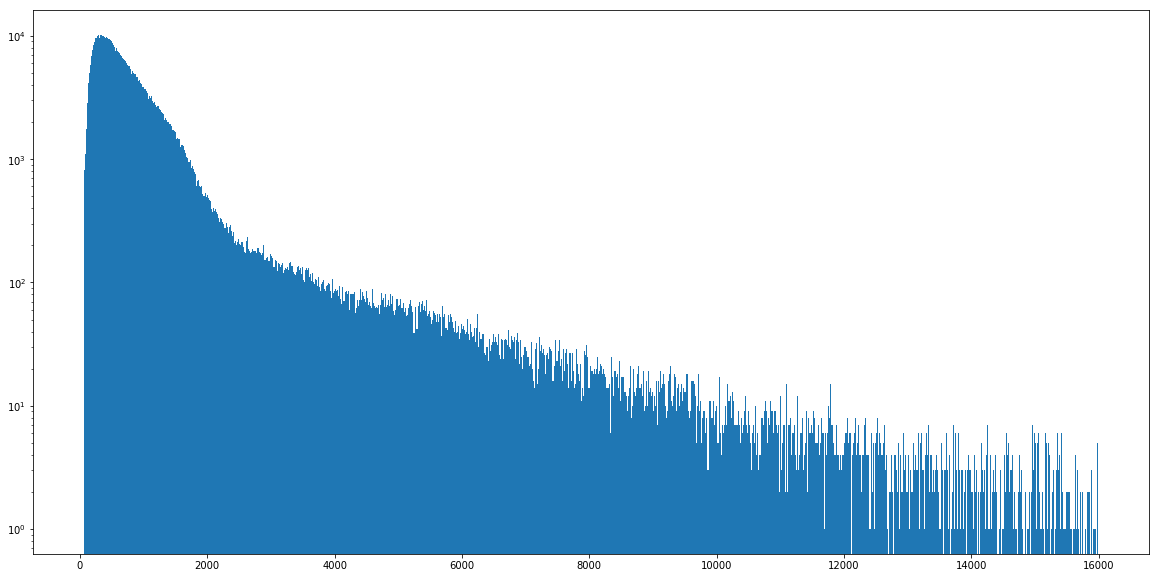

In [6]:
_=plt.hist(bikes[bikes.dur<16000].dur, log=True, bins=1000)

In [7]:
short = bikes[bikes.dur<16000]

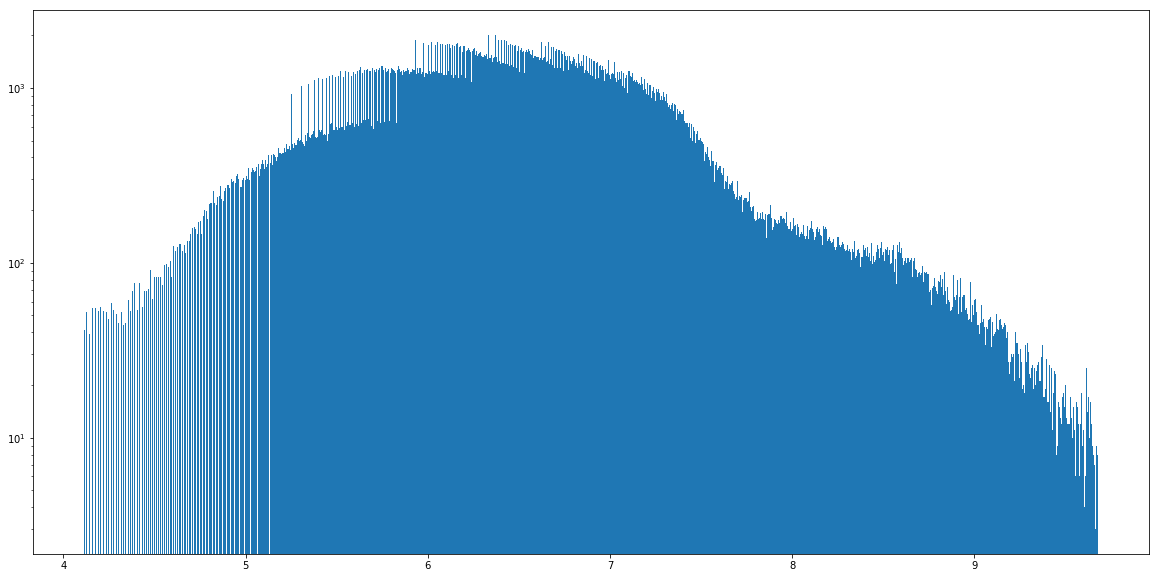

In [8]:
_=plt.hist(np.log1p(short.dur), log=True, bins=1000)

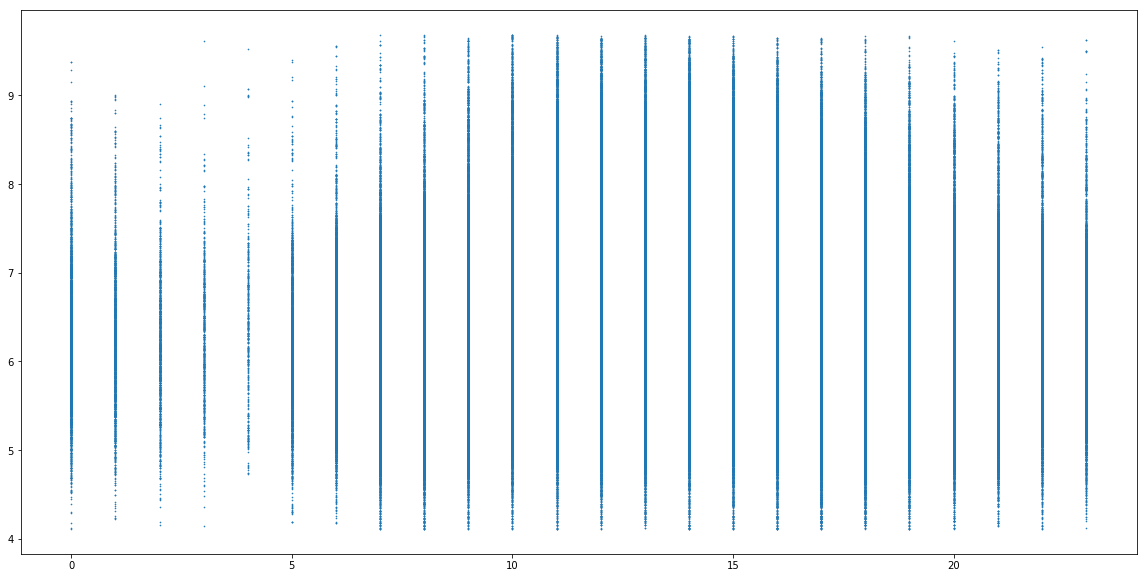

In [9]:
plt.scatter(short.start.dt.hour, np.log1p(short.dur), s=.4)

In [10]:
np.log1p(0), np.log(0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


(0.0, -inf)

In [11]:
bikes['log_dur'] = np.round(np.log1p(bikes.dur), 1)

In [12]:
monday = bikes[bikes.start.dt.dayofweek==1]

In [13]:
dur_hour = monday.groupby(['log_dur', monday.start.dt.hour]).count()

In [14]:
dur_hour

Duration (ms)  Start date  End date  Start station number  \
log_dur start                                                              
4.1     7                  1           1         1                     1   
        9                  2           2         2                     2   
        11                 1           1         1                     1   
        14                 2           2         2                     2   
        16                 2           2         2                     2   
        17                 3           3         3                     3   
        19                 3           3         3                     3   
        21                 1           1         1                     1   
        22                 1           1         1                     1   
4.2     7                  5           5         5                     5   
        8                  3           3         3                     3   
        9                  3           3         3                     3   
        13                 2           2         2                     2   
        15                 3           3         3                     3   
        16                 6           6         6                     6   
        17                 7           7         7                     7   
        18                 4           4         4                     4   
        20                 7           7         7                     7   
        21                 2           2         2                     2   
4.3     1                  1           1         1                     1   
        5                  1           1         1                     1   
        7                  4           4         4                     4   
        8                  2           2         2                     2   
        9                  2           2         2                     2   
        10                 1           1         1                     1   
        11                 2           2         2                     2   
        12                 4           4         4                     4   
        13                 6           6         6                     6   
        14                 1           1         1                     1   
        16                 1           1         1                     1   
...                      ...         ...       ...                   ...   
10.7    19                 2           2         2                     2   
        20                 1           1         1                     1   
        22                 1           1         1                     1   
        23                 1           1         1                     1   
10.8    3                  1           1         1                     1   
        6                  1           1         1                     1   
        17                 3           3         3                     3   
        18                 4           4         4                     4   
        19                 3           3         3                     3   
        20                 1           1         1                     1   
        21                 1           1         1                     1   
        23                 1           1         1                     1   
10.9    16                 2           2         2                     2   
        17                 1           1         1                     1   
        18                 1           1         1                     1   
        20                 1           1         1                     1   
11.0    17                 1           1         1                     1   
        19                 1           1         1                     1   
        20                 1           1         1                     1   
11.1    14                 1           1         1             

In [15]:
duration_hour = dur_hour.start.unstack().T.fillna(0)
duration_hour

log_dur,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,4.9,5.0,...,10.5,10.6,10.7,10.8,10.9,11.0,11.1,11.2,11.3,11.4
start,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,1.0,4.0,1.0,7.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,2.0,1.0,2.0,4.0,9.0,11.0,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,5.0,4.0,1.0,5.0,12.0,25.0,31.0,46.0,46.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,3.0,2.0,6.0,7.0,11.0,22.0,52.0,68.0,79.0,...,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


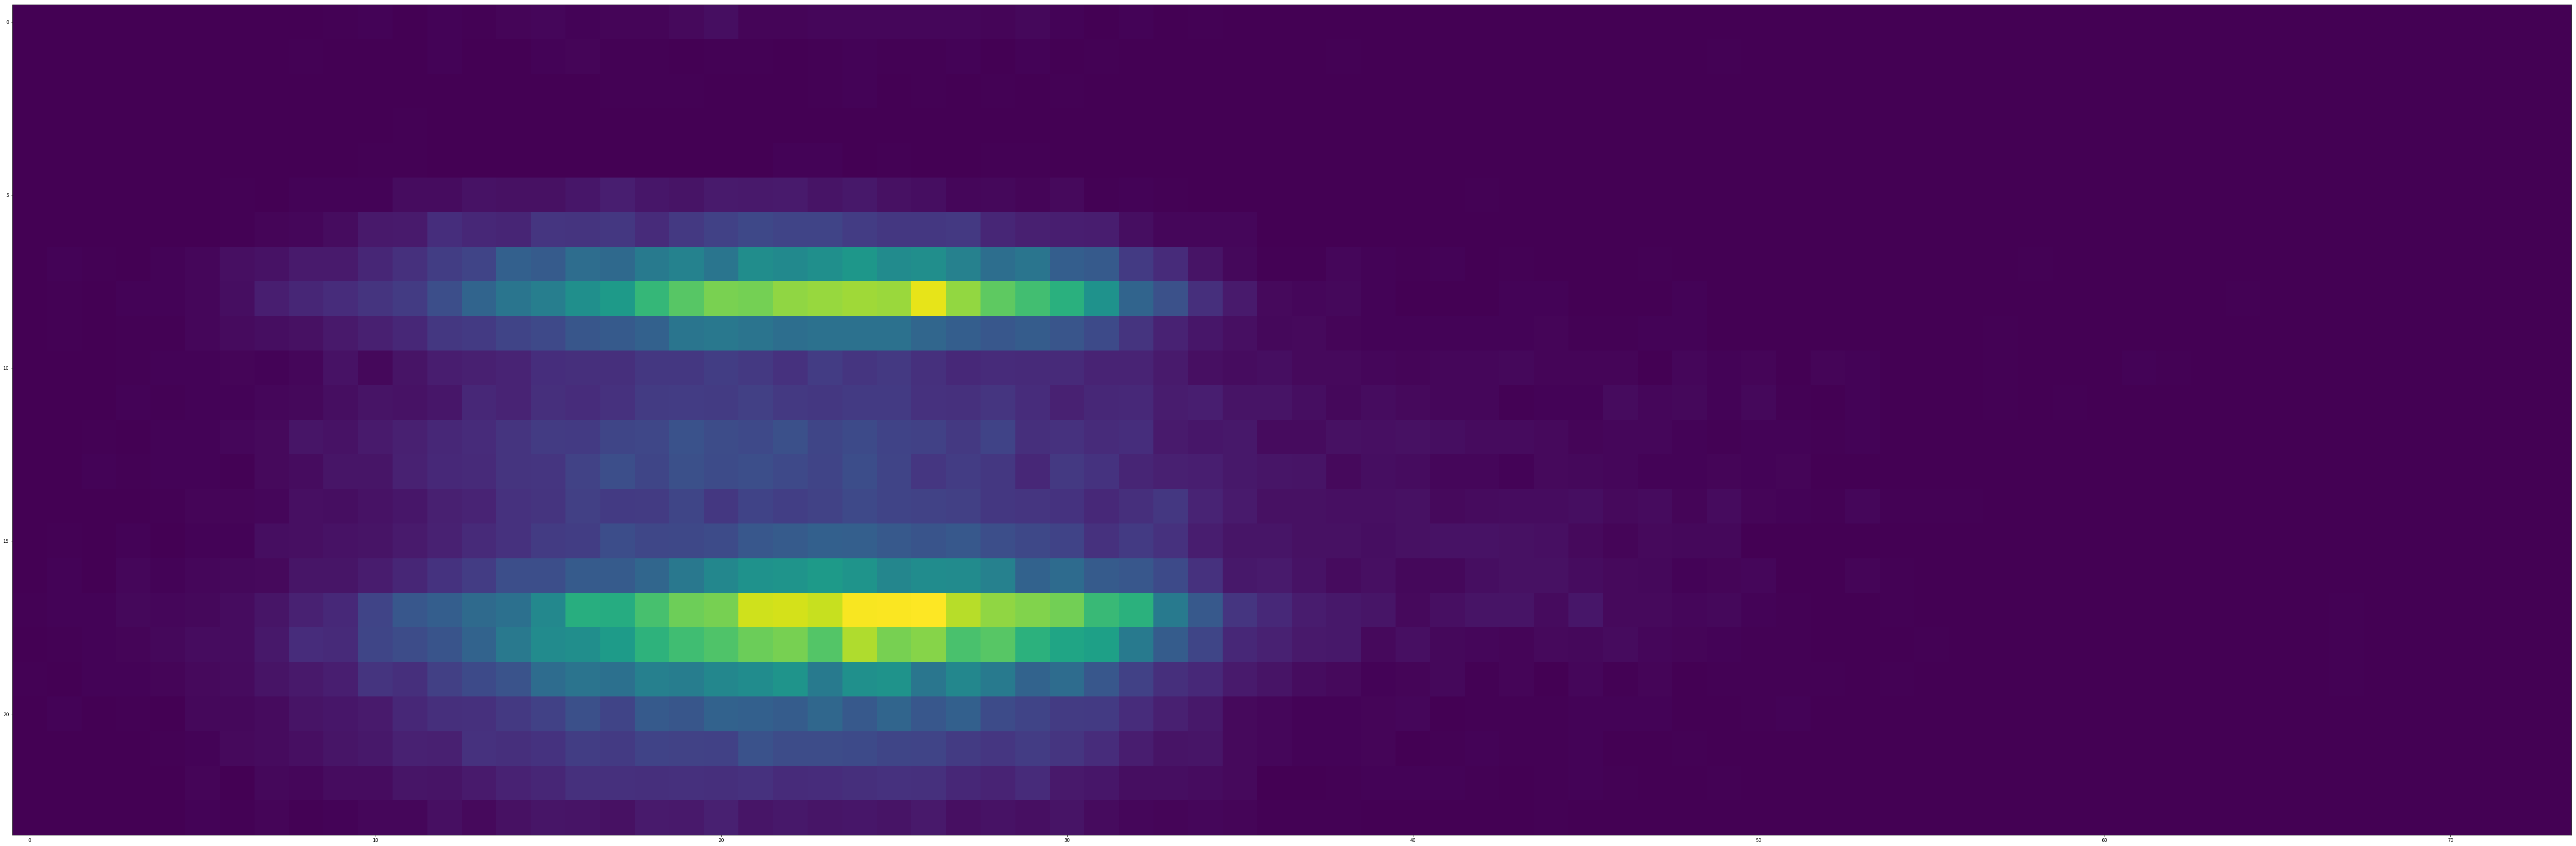

In [16]:
plt.figure(figsize=(100,100))
plt.imshow(duration_hour)

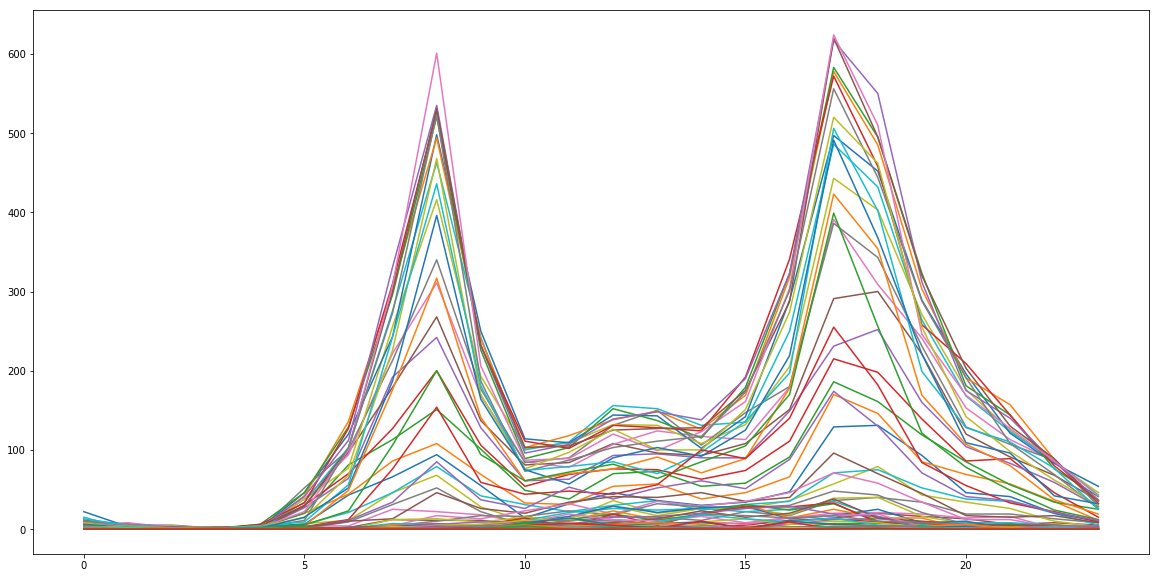

In [17]:
_=plt.plot(duration_hour)

In [18]:
bikes['Member Type'].value_counts()

Registered    467432
Casual         84967
Name: Member Type, dtype: int64

### Create a new column that represents the hour+minute of the day as a fraction (i.e. 1:30pm = 13.5)

In [19]:
np.round(.65, 1)

0.6

In [20]:
37//6, (37//6)/10, 37/60

(6, 0.6, 0.6166666666666667)

In [21]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute//6)/10)

In [22]:
bikes['roundhour_of_day'] = (bikes.start.dt.hour ) # keep the hour handy as well

### Aggregate to get a count per hour/minute of the day across all trips

In [23]:
reg_bikes = bikes[bikes['Member Type']=='Registered']
hours = reg_bikes.groupby([reg_bikes.hour_of_day, reg_bikes.start.dt.dayofweek]).agg('count')
hours['hour'] = hours.index
day_hour_count = hours.dur.unstack()
plt.figure(figsize=(20,10))
plt.plot(day_hour_count.index, day_hour_count[0])
plt.plot(day_hour_count.index, day_hour_count[1])
plt.plot(day_hour_count.index, day_hour_count[2])
plt.plot(y.index, day_hour_count[3])
plt.plot(y.index, day_hour_count[4])
plt.plot(y.index, day_hour_count[5])
plt.plot(y.index, day_hour_count[6])

NameError: name 'y' is not defined

<Figure size 1440x720 with 0 Axes>

In [ ]:
day_hour_count

In [ ]:
hoursn = bikes.groupby('roundhour_of_day').agg('count')
hoursn['hour'] = hoursn.index
(hoursn.start/90).plot() # 90 days in a quarter

In [ ]:
hour_count = bikes.groupby(bikes.start.dt.dayofyear*24 + bikes.start.dt.hour).count()

In [ ]:
plt.figure(figsize=(20,10))
hour_count.start.plot()

In [ ]:
day_count = bikes.groupby(bikes.start.dt.dayofyear).count()

In [ ]:
day_hour = bikes.groupby([bikes.start.dt.dayofyear, bikes.start.dt.hour]).count()

In [ ]:
day_hour.start.unstack()

In [ ]:
plt.figure(figsize=(20,10))
plt.imshow(day_hour.start.unstack().T)

In [ ]:
day_count.start.plot()

In [ ]:
bikes.start.dt.dayofyear

In [ ]:
bikes[bikes.start=="2016-01-10"].shape

# Assignment 4


Explain the results in a **paragraph + charts** of  to describe which model you'd recommend. This means show the data and the model's line on the same chart. The paragraph is a simple justification and comparison of the several models you tried.

## 1. Using the **`day_hour_count`** dataframe create two dataframe `monday` and `saturday` that represent the data for those days. (hint: Monday is day=0)


## 2a. Create 3 models fit to `monday` with varying polynomial degrees. Repeat for 

## 2b. Repeat `2a` for `saturday`

## 3. (for both `monday` and `saturday`) Choose one of the polynomial models and create 3 new models fit to `hour_of_day` with different Ridge Regression $\alpha$ (alpha) Ridge Coefficient values


In [ ]:
#Monday


In [ ]:
#Saturday
